<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/kaggle-competition/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
r = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic 

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 20.5MB/s]


In [4]:
!unzip -qq titanic.zip

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
import seaborn as sns

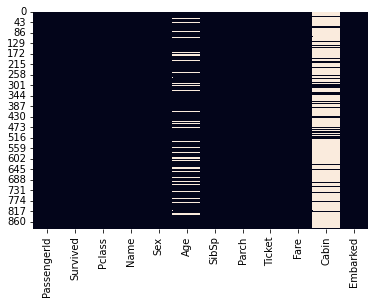

In [9]:
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [11]:
df_label = df["Survived"]

In [12]:
df_label.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [13]:
df_data = df[["PassengerId", "Pclass", "Sex", "Age", "Fare", "Survived"]]

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   Fare         891 non-null    float64
 5   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


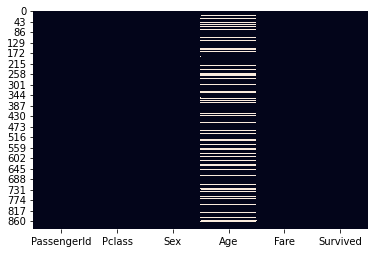

In [15]:
sns.heatmap(df_data.isnull(), cbar=False)

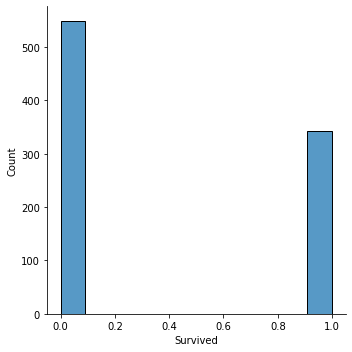

In [16]:
r = sns.displot(data=df_data["Survived"])

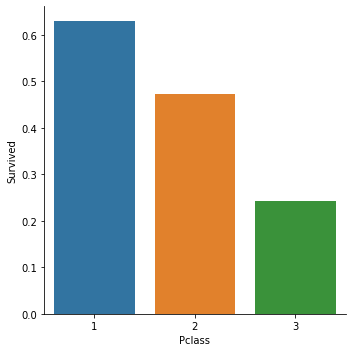

In [17]:
r = sns.catplot(data=df_data, x="Pclass", y="Survived", kind='bar', ci=None)

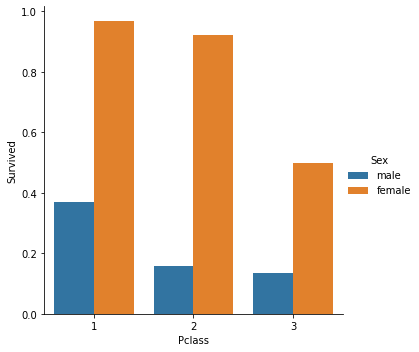

In [18]:
r = sns.catplot(data=df_data, y="Survived", x="Pclass", hue="Sex", kind="bar", ci=None)

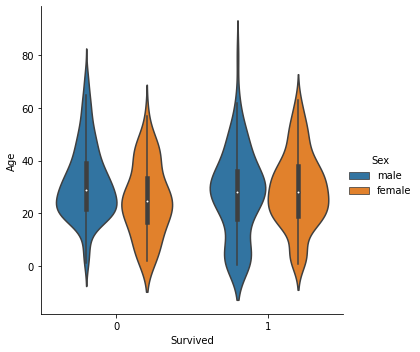

In [19]:
r= sns.catplot(data=df_data, x="Survived", y="Age", hue="Sex", kind="violin")

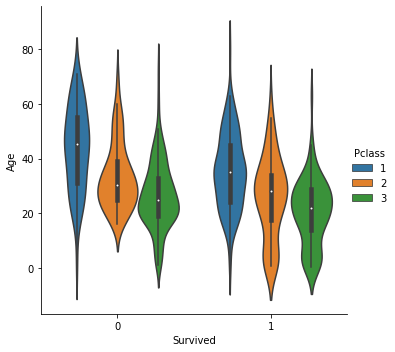

In [20]:
r=sns.catplot(data=df_data, x="Survived", y="Age", hue="Pclass", kind="violin")

In [21]:
encoding_ref = {"Sex": {"male": 0, "female": 1}}

In [22]:
df_data = df_data.replace(encoding_ref)

df_data.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Survived
0,1,3,0,22.0,7.2500,0
1,2,1,1,38.0,71.2833,1
2,3,3,1,26.0,7.9250,1
3,4,1,1,35.0,53.1000,1
4,5,3,0,35.0,8.0500,0


In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   Fare         891 non-null    float64
 5   Survived     891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [24]:
mean_age = round(df_data["Age"].mean(), 2)
mean_age

29.7

In [25]:
#Fill blanks with mean of Age
df_data["Age"] = df_data["Age"].fillna(mean_age)

In [26]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Survived     891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [27]:
def return_data_and_label(df_data):
  #shuffle rows
  df_data = df_data.sample(frac = 1)
  return df_data[["Pclass", "Sex", "Age", "Fare"]].to_numpy(), df_data["Survived"].to_numpy()

In [28]:
training_data, training_label = return_data_and_label(df_data)

In [29]:
training_data.shape

(891, 4)

In [30]:
#normalize data
training_data = training_data / 100.

In [31]:
training_data

array([[0.03    , 0.      , 0.07    , 0.396875],
       [0.03    , 0.      , 0.09    , 0.469   ],
       [0.02    , 0.      , 0.19    , 0.3675  ],
       ...,
       [0.03    , 0.      , 0.03    , 0.313875],
       [0.03    , 0.      , 0.29    , 0.095   ],
       [0.03    , 0.01    , 0.297   , 0.081375]])

In [32]:
training_label.shape

(891,)

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [103]:
def get_model():
  model = keras.Sequential([
      layers.Input(shape=(4,)),
      layers.Dense(64, activation="relu"),
      layers.Dense(128, activation="relu"),
      #layers.Dense(256, activation="relu"),
      layers.Dropout(0.5),
      layers.Dense(1, activation="sigmoid")
  ])

  model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=['accuracy'])

  return model

In [104]:
#Try various options. Training loss bottoms out around 320 epochs
epochs=500

In [105]:
model = get_model()

run_history = model.fit(training_data,
                        training_label,
                        epochs = epochs,
                        validation_split=0.3,
                        batch_size=32)

Epoch 1/500
20/20 [==============================] - 1s 11ms/step - loss: 0.6665 - accuracy: 0.6469 - val_loss: 0.6477 - val_accuracy: 0.6866
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6565 - val_loss: 0.6306 - val_accuracy: 0.6679
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6296 - accuracy: 0.6645 - val_loss: 0.6213 - val_accuracy: 0.6567
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6139 - accuracy: 0.6758 - val_loss: 0.6137 - val_accuracy: 0.6866
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6095 - accuracy: 0.6742 - val_loss: 0.6130 - val_accuracy: 0.6679
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6114 - accuracy: 0.6790 - val_loss: 0.6196 - val_accuracy: 0.6604
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.6774 - val_loss: 0.6116 - val_accuracy: 0.6567
Epoch 8/500


In [106]:
import matplotlib.pyplot as plt

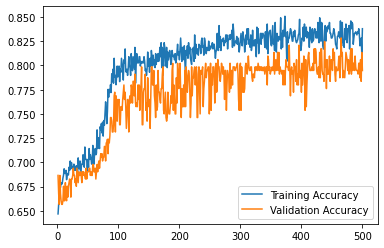

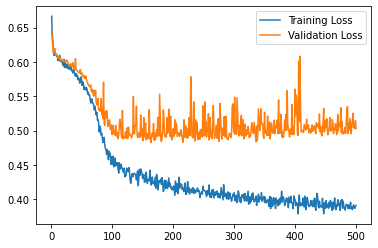

In [107]:
chart_epochs = range(1, epochs + 1)

plt.plot(chart_epochs, run_history.history['accuracy'], label="Training Accuracy")
plt.plot(chart_epochs, run_history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(chart_epochs, run_history.history['loss'], label="Training Loss")
plt.plot(chart_epochs, run_history.history['val_loss'], label="Validation Loss")
plt.legend()

plt.show()

In [39]:
test_df = pd.read_csv("test.csv")

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [41]:
test_df["Age"] = test_df["Age"].fillna(mean_age)

In [42]:
test_df["Fare"] = test_df["Fare"].fillna(round(df_data["Fare"].mean(), 2))

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
test_df = test_df.replace(encoding_ref)

In [45]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
test_data = test_df[["Pclass", "Sex", "Age", "Fare"]].to_numpy()

In [47]:
test_data = test_data / 100.

In [48]:
test_data.shape

(418, 4)

In [49]:
test_data[0]

array([0.03    , 0.      , 0.345   , 0.078292])

In [77]:
prediction = (model.predict(test_data)>0.5).astype("int32")

In [84]:
test_df["Survived"] = prediction

In [85]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1


In [86]:
output_df = test_df[["PassengerId", "Survived"]]

In [93]:
output_df.to_csv("mysubmission2.csv", index=False)

In [94]:
!kaggle competitions submit -c titanic -f mysubmission2.csv -m "Prediction 1 - SRS 12 SEPT"

100% 2.77k/2.77k [00:00<00:00, 7.44kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster